# Multiple Linear Regression

In [1]:
## Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import normaltest

%matplotlib inline

Analyze tips data from seaborn   
- Total Bill and Size as Independent Variable  
- Tip as Dependent Variable  

Analyze the relationship  
Apply Multiple Linear Regression  
Perform F Test and T Test  
Interpret the result  

use α 5%

In [2]:
## Dataset

tips= sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Simple EDA
* Descriptive statistics
* Korelasi
* Graph

In [3]:
tips[['total_bill','tip','size']]

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [4]:
tips[['total_bill','tip','size']].describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
normaltest(tips['tip']) #tidak normal

NormaltestResult(statistic=79.37862574074785, pvalue=5.796294322907102e-18)

In [6]:
tips[['total_bill','tip','size']].corr('spearman')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


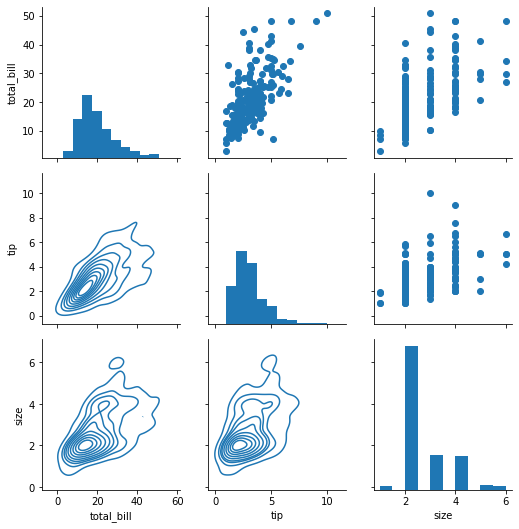

In [9]:
g= sns.PairGrid(tips[['total_bill','tip','size']])
g.map_diag(plt.hist) #posisi diagonal
g.map_upper(plt.scatter) #di atas diagonal
g.map_lower(sns.kdeplot) # di bawah diagonal
plt.show()

## Model

* Y: Tip
* x: Total Bill dan Size

In [10]:
sm_lm=sm.OLS(tips['tip'],sm.add_constant(tips[['total_bill','size']]))
result=sm_lm.fit()

In [11]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           9.67e-34
Time:                        09:51:56   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

F-test  
* B1, B2: P-value (Prob (F-statistic)) <=0.05, artinya kita memiliki cukup bukti bahwa setidaknya salah satu variabel independen (antara `total_bill` dan `size`) memiliki pengaruh signifikan terhadap nilai `tip`  

Partial test (T-test)  
* B0: p-val <=0.05, artinya intersep dibutuhkan, tetapi, dalam kasus ini nilai intersep tidak relevan, karena ketika `size` atau `total_bill` =0, tidak mungkin ada tip yang diberikan.
* B1 (`total_bill`): p-val <= 0.05, artinya ada cukup bukti bahwa peningkatan nilai `total bill` meningkatkan nilai `tip`
* B2 (`size`): pval <=0.05, artinya ada cukup bukti bahwa peningkatan nilai `size` juga meningkatkan nilai `tip`.

Parameter estimate (coef)

* B0= 0.6689, tidak relevan pada kasus ini
* B1= 0.0927, artinya ketika nilai `total_bill` meningkat sebesar 1USD, dan **nilai variable lain tetap**, maka nilai `tip` akan meningkat sebesar 0.0927 USD. (perhatikan bahwa intepretasi ini direkomendasikan pada rentang nilai total bill 3.07-50.81 USD)
* B2=0.1926: ketika nilai `size` meningkat sebanyak 1 orang dan **nilai variabel lain tetap**, maka nilai `tip` akan meningkat sebanyak 0.1926 USD. (perhatikan bahwa intepretasi ini direkomendasikan pada rentang nilai size 1-6 orang)

Coefficient Determination:
R-squared adj=46.3%, artinya model yang kita buat mampu menjelaskan 46.3% dari varian data tip.

dengan menambah variabel size, nilai R-square meningkat dari 45.7 menjadi 46.3%

## Residual Analysis
* check normality
* check Gauv Markov assumption

In [12]:
result.resid #nilai redisual dari model

0     -1.619340
1     -0.545394
2      0.305355
3      0.060408
4     -0.109157
         ...   
239    1.981794
240   -1.574089
241   -1.155952
242   -0.956292
243    0.204703
Length: 244, dtype: float64

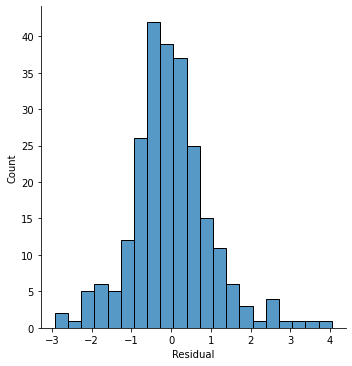

In [14]:
# histogram

sns.displot(result.resid)
plt.xlabel('Residual')
plt.show()

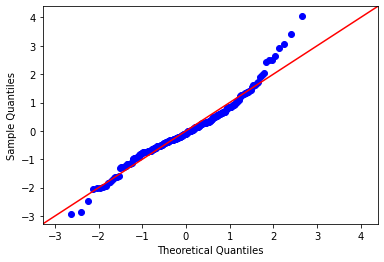

In [15]:
sm.qqplot(result.resid, line='45')
plt.show() #kalau sebaran data mengikuti garis, normal

In [16]:
normaltest(result.resid)#tidak normal

NormaltestResult(statistic=24.753063433480584, pvalue=4.216388016270723e-06)

### Gauv Markov Assumption

In [17]:
result.fittedvalues #hasil prediksi berdasarkan model 

0      2.629340
1      2.205394
2      3.194645
3      3.249592
4      3.719157
         ...   
239    3.938206
240    3.574089
241    3.155952
242    2.706292
243    2.795297
Length: 244, dtype: float64

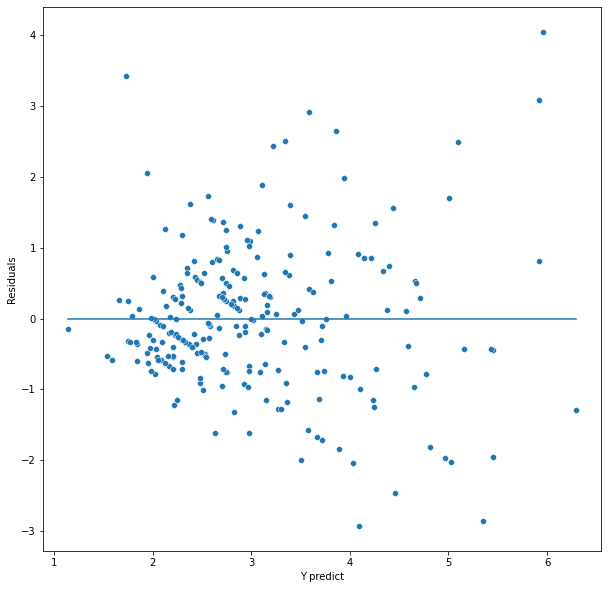

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=result.fittedvalues, y=result.resid)
sns.lineplot(x=result.fittedvalues,y=0)
plt.ylabel('Residuals')
plt.xlabel('Y predict')
plt.show()

In [21]:
np.mean(result.resid) # asumsi rata2 residual=0 terpenuhi

-5.940603200617231e-15

* sebaran residual acak, asumsi error uncorrelated terpenuhi
* varians konstan --> tidak terpenuhi (hasil prediksi dan parameter tidak stabil)

## Multicolinearity
* hitung VIF

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [33]:
calc_vif(tips[['total_bill','size']])

,variables,VIF
0,total_bill,8.684373
1,size,8.684373


vif>4, ada indikasi multicolinearity.  
Bisa coba pilih salah satu antara total bill atau size

# Dummy variables

In [36]:
df_cat= pd.DataFrame({
    'Gender':['Male','Female','Female','Male','Female','Female','Male'],
    'City':['Jakarta', 'Bogor','Bogor', 'Bekasi', 'Bekasi','Jakarta', 'Bekasi'],
    'Age':[34,28,23,26,29,25,25],
    'Income':[20,15,7,9,12,11,9]
})

In [38]:
df_cat

,Gender,City,Age,Income
0,Male,Jakarta,34,20
1,Female,Bogor,28,15
2,Female,Bogor,23,7
3,Male,Bekasi,26,9
4,Female,Bekasi,29,12
5,Female,Jakarta,25,11
6,Male,Bekasi,25,9


In [48]:
pd.get_dummies(df_cat)

,Age,Income,Gender_Female,Gender_Male,City_Bekasi,City_Bogor,City_Jakarta
0,34,20,0,1,0,0,1
1,28,15,1,0,0,1,0
2,23,7,1,0,0,1,0
3,26,9,0,1,1,0,0
4,29,12,1,0,1,0,0
5,25,11,1,0,0,0,1
6,25,9,0,1,1,0,0


In [51]:
df_dummy=pd.get_dummies(df_cat, drop_first=True, columns=['Gender','City']) #female hilang, bekasi hilang. 
#mencegah multicolinearity
df_dummy

,Age,Income,Gender_Male,City_Bogor,City_Jakarta
0,34,20,1,0,1
1,28,15,0,1,0
2,23,7,0,1,0
3,26,9,1,0,0
4,29,12,0,0,0
5,25,11,0,0,1
6,25,9,1,0,0


## With data tips

In [52]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [55]:
tips_dummy=pd.get_dummies(tips, drop_first=True, columns=['sex','smoker','day','time'])
tips_dummy.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


In [56]:
tips_dummy.columns

Index(['total_bill', 'tip', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'],
      dtype='object')

## Create Model
Y= tip  
x= 'total_bill', 'tip', 'size', 'sex_Female', 'smoker_No', 'day_Fri','day_Sat', 'day_Sun', 'time_Dinner'

In [57]:
fitur=['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner']

sm_lm=sm.OLS(tips_dummy['tip'], sm.add_constant(tips_dummy[fitur]))
result=sm_lm.fit()

In [59]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.20e-28
Time:                        11:33:09   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

contoh intepretasi untuk dummy variables (hasil uji tidak signifikan, jadi seharusnya tidak diintepretasikan)

Parameter estimates (coef):

* sex_Female= 0.324, artinya tip yang diberikan oleh pengunjung wanita lebih tinggi 0.0324 USD dibandingkan dengan pengunjung pria  

* time_Dinner= -0.0681, artinya tip yang diberikan sewaktu makan malam, **lebih rendah** 0.0681 USD dibandingkan sewaktu makan siang  

* day_Fri= 0.1632, artinya tip yang diberikan di hari Jumat, lebih tinggi 0.1632 USD dibandingkan hari Kamis.

## residual analysis

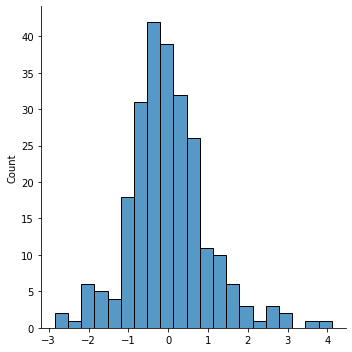

In [61]:
sns.displot(result.resid)

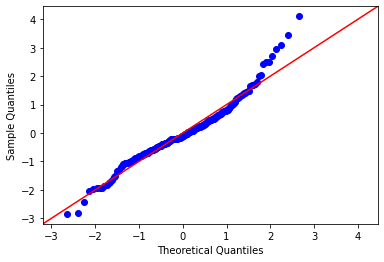

In [62]:
sm.qqplot(result.resid, line='45')
plt.show()

C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


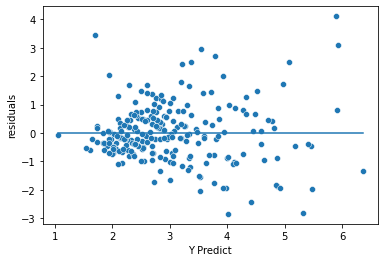

In [63]:
sns.scatterplot(result.fittedvalues,result.resid)
sns.lineplot(result.fittedvalues,0)
plt.xlabel('Y Predict')
plt.ylabel('residuals')
plt.show()

**SUMMARY**
1. Dari histogram dan qqplot, residual model cenderung memiliki distribusi normal
2. Residual model berkumpul di sekitar nilai 0 (rata-rata = 0)
3. Tidak ada pola tertentu (uncorrelated)
4. Varians residual tidak konstan (homoscedascity tidak terpenuhi)
5. Ada nilai VIF sangat tinggi (>10): masuk akal karena memang ada hubungan antara `size` dan `total_bill`. Jadi kita bisa memilih salah satu di antara `size` dan `total_bill`. `time_dinner` juga memiliki nilai VIF yang sangat tinggi, sehingga bisa kita coba drop.

## Multicolinearity

In [66]:
calc_vif(tips_dummy[fitur])
# nilai vif time dinner, day sun, day sat, size, di ats batas toleransi

,variables,VIF
0,total_bill,9.443197
1,size,12.048233
2,sex_Female,1.479481
3,smoker_No,2.635550
4,day_Fri,2.559699
5,day_Sat,17.730443
6,day_Sun,15.810322
7,time_Dinner,33.150259


In [70]:
# coba drop time dinner dan size
calc_vif(tips_dummy.drop(columns=['tip','time_Dinner','size'])) #tidak ada multicolinearity

,variables,VIF
0,total_bill,3.670370
1,sex_Female,1.439580
2,smoker_No,2.228945
3,day_Fri,1.175956
4,day_Sat,1.985433
5,day_Sun,2.068751


In [74]:
## Model improvement

fitur=list(tips_dummy.drop(columns=['tip','time_Dinner','size']).columns)

sm_lm=sm.OLS(tips_dummy['tip'], sm.add_constant(tips_dummy[fitur]))
result=sm_lm.fit()

In [75]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     33.81
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           2.35e-29
Time:                        11:48:00   Log-Likelihood:                -349.51
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     237   BIC:                             737.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7819      0.238      3.285      0.0

In [3]:
mpg=sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Buat model linear regresi dengan  
* y= `mpg`
* x= `displacement, horsepower, weight, acceleration, origin`

Lakukan analisis residual dan multikolineariti untuk model yang kalian buat  
* coba pilih features yang sesuai sehingga model tidak memiliki multikolineariti  
    
Intepretasikan summary dari model kalian

In [19]:
mpg2=mpg[['mpg','displacement','horsepower','weight','acceleration','origin']].dropna()
mpg_dummy=pd.get_dummies(mpg2,drop_first=True, columns=['origin'])
mpg_dummy

,mpg,displacement,horsepower,weight,acceleration,origin_japan,origin_usa
0,18.0,307.0,130.0,3504,12.0,0,1
1,15.0,350.0,165.0,3693,11.5,0,1
2,18.0,318.0,150.0,3436,11.0,0,1
3,16.0,304.0,150.0,3433,12.0,0,1
4,17.0,302.0,140.0,3449,10.5,0,1
...,...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,0,1
394,44.0,97.0,52.0,2130,24.6,0,0
395,32.0,135.0,84.0,2295,11.6,0,1
396,28.0,120.0,79.0,2625,18.6,0,1


In [21]:
calc_vif(mpg_dummy.drop(columns='mpg'))

,variables,VIF
0,displacement,55.281748
1,horsepower,47.551541
2,weight,139.634562
3,acceleration,23.388838
4,origin_japan,2.113301
5,origin_usa,6.712712


In [25]:
calc_vif(mpg_dummy.drop(columns=['mpg','weight','displacement']))

,variables,VIF
0,horsepower,7.281166
1,acceleration,5.882027
2,origin_japan,2.043039
3,origin_usa,5.421956
